#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Estudio\redes neuronales\tarea_regresion\tarea-regresion-Neko-xero\ex1data2.txt", sep=",")

print(df.head())




   2104  3  399900
0  1600  3  329900
1  2400  3  369000
2  1416  2  232000
3  3000  4  539900
4  1985  4  299900


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y
X = data[:, 0:2]
y = data[:, 2:3]

print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i,0].item():.0f}')


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


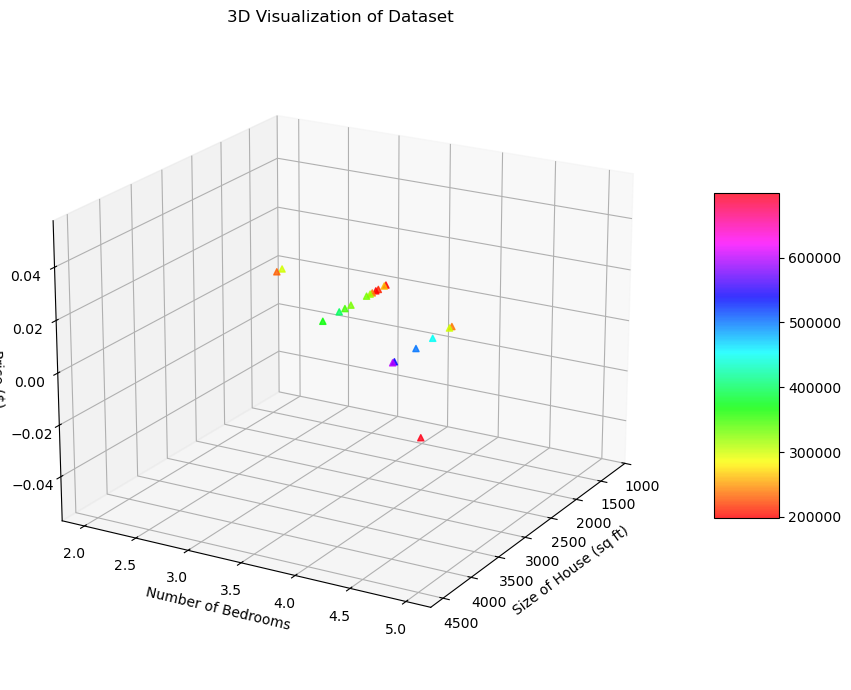

In [19]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:3]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [25]:

X = data[:, 0:2]
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Aplicar normalización
X, mu, sigma = featureNormalize(X)

print(f'\nMedia: {mu}, Desviación estándar: {sigma}')
print('Primeros 10 ejemplos normalizados:')
for i in range(10):
    print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')

# Agregar columna de unos para el término de sesgo (bias)
m = X.shape[0]
X = np.hstack([np.ones((m, 1)), X])


Media: [2000.68085106    3.17021277], Desviación estándar: [7.86202619e+02 7.52842809e-01]
Primeros 10 ejemplos normalizados:
x = [0.1314 -0.2261]
x = [-0.5096 -0.2261]
x = [0.5079 -0.2261]
x = [-0.7437 -1.5544]
x = [1.2711 1.1022]
x = [-0.0199 1.1022]
x = [-0.5936 -0.2261]
x = [-0.7297 -0.2261]
x = [-0.7895 -0.2261]
x = [-0.6445 -0.2261]


# Cost Function

The objective of linear regression is to minimize the cost function:
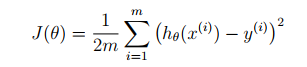

where the hypothesis h is given by

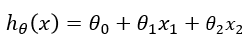




In [29]:
# using numpy and scipy
# Sigmoid function
from scipy.optimize import minimize

#Implement cost function
def cost_function(theta, X, y):
    m = len(y)
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return J

m = data.shape[0]
X = data[:, 0:2]
[X,mu, sigma] = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])
print(X[0:5,:])
theta = np.zeros((3, 1))
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")


[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
Model parameters: [[0.]
 [0.]
 [0.]]
Cost function: 65591548106.45744


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

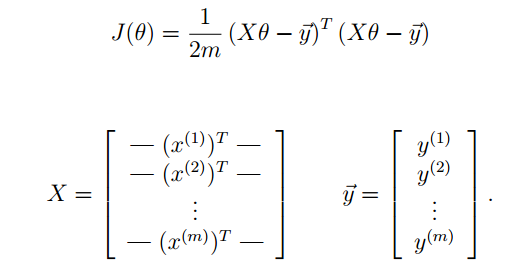

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

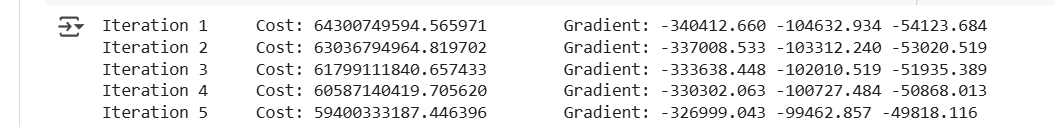

In [30]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 300
theta = np.zeros((3, 1))
alpha = 0.01
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)                          # número de ejemplos
    J_history = np.zeros(iterations)   # INICIALIZAR AQUÍ ✔️

    for iter in range(iterations):

        error = np.dot(X, theta) - y
        grad_J = (1 / m) * np.dot(X.T, error)
        theta = theta - alpha * grad_J

        J_history[iter] = cost_function(theta, X, y)
        print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {grad_J[0, 0]:.3f} {grad_J[1, 0]:.3f} {grad_J[2, 0]:.3f}")

    return theta
theta = gradientDescent(X, y, theta, alpha, iterations);
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma
print(normalized_features)
# Add the bias term (1) as the first element
predict1 = np.hstack([1, normalized_features]) @ theta
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a profit of ${(predict1 * 10000).item():.2f}')




Iteration 1	Cost: 64297776251.620102	Gradient: -340412.660 -105764.133 -54708.822
Iteration 2	Cost: 63031018305.521317	Gradient: -337008.533 -104400.141 -53569.489
Iteration 3	Cost: 61790694237.532494	Gradient: -333638.448 -103056.168 -52449.188
Iteration 4	Cost: 60576236901.991035	Gradient: -330302.063 -101731.908 -51347.615
Iteration 5	Cost: 59387091739.988602	Gradient: -326999.043 -100427.059 -50264.474
Iteration 6	Cost: 58222716488.389389	Gradient: -323729.052 -99141.324 -49199.470
Iteration 7	Cost: 57082580895.895401	Gradient: -320491.762 -97874.410 -48152.317
Iteration 8	Cost: 55966166445.978844	Gradient: -317286.844 -96626.028 -47122.729
Iteration 9	Cost: 54872966086.507782	Gradient: -314113.976 -95395.896 -46110.427
Iteration 10	Cost: 53802483965.895058	Gradient: -310972.836 -94183.734 -45115.137
Iteration 11	Cost: 52754235175.605446	Gradient: -307863.107 -92989.267 -44136.588
Iteration 12	Cost: 51727745498.859932	Gradient: -304784.476 -91812.224 -43174.513
Iteration 13	Cost: 5

# Visualization

#Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against
the number of the iterations.

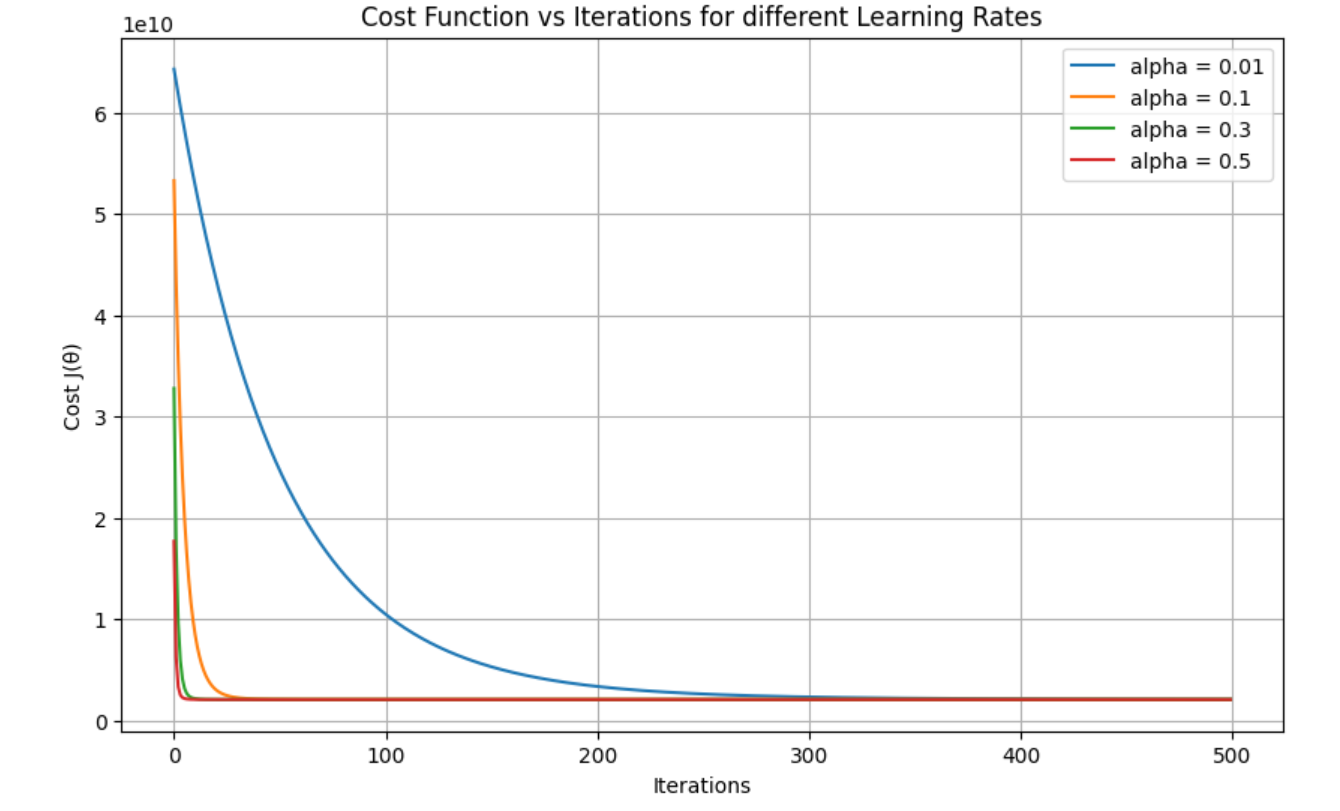

In [15]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 500
theta = np.zeros((3, 1))
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])
matrix_J = np.zeros((iterations, len(alpha_vector)))

